## Library

Please install the following library if this is the first time you are running this code.

```python
!pip install transformers
!pip install gradio
!pip install timm
!pip install torchvision
```

In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

## Segment Anything Model (SAM)

Let us use the Segment Anything Model (SAM) by Meta AI.

Paper can be seen [here](https://segment-anything.com/).

We give credits to [Zigeng](https://huggingface.co/Zigeng/SlimSAM-uniform-77).

In [3]:
from transformers import pipeline

In [4]:
sam_pipe = pipeline("mask-generation", "Zigeng/SlimSAM-uniform-77")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [5]:
from PIL import Image

CPU times: user 56.1 ms, sys: 3.25 ms, total: 59.4 ms
Wall time: 150 ms


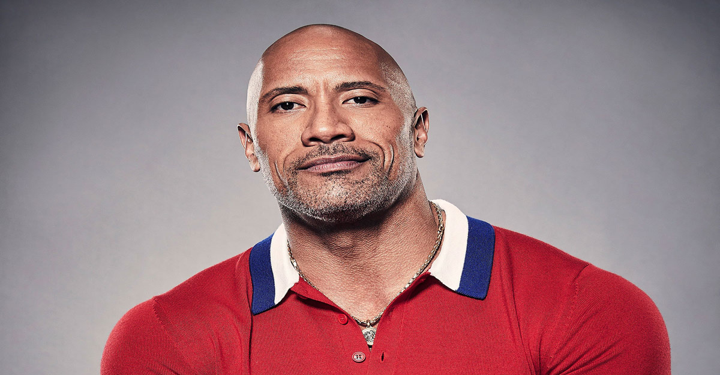

In [9]:
%%time

raw_image = Image.open('dwayne-the-rock-.jpg')
raw_image.resize((720, 375))

In [10]:
%%time

output = sam_pipe(raw_image, points_per_batch=32)

CPU times: user 5min 8s, sys: 3min 18s, total: 8min 27s
Wall time: 9min 9s


In [11]:
from helper import show_pipe_masks_on_image

ImportError: cannot import name 'show_pipe_masks_on_image' from 'helper' (/content/helper.py)

In [ ]:
show_pipe_masks_on_image(raw_image, output)

In [ ]:
from transformers import SamModel, SamProcessor

In [ ]:
%%time

model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-77")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-77")

In [ ]:
raw_image.resize((720, 375))

In [ ]:
input_points = [[[1600, 700]]]

In [ ]:
import torch

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

In [ ]:
predicted_masks = processor.image_processor.post_process_masks(
    outputs.pred_masks,
    inputs["original_sizes"],
    inputs["reshaped_input_sizes"]
)

In [ ]:
len(predicted_masks)

In [ ]:
predicted_mask = predicted_masks[0]
predicted_mask.shape

In [ ]:
outputs.iou_scores

In [ ]:
from helper import show_mask_on_image

In [ ]:
for i in range(3):
    show_mask_on_image(raw_image, predicted_mask[:, i])

## Depth Estimation with DPT

The model was introduced by the author in [this paper](https://arxiv.org/abs/2103.13413) and the model is first released [here](https://github.com/isl-org/DPT).

In [ ]:
depth_estimator = pipeline(task="depth-estimation", model="Intel/dpt-hybrid-midas")

In [ ]:
raw_image = Image.open('pedestrians-on-crosswalk.png')
raw_image.resize((806, 621))

In [ ]:
output = depth_estimator(raw_image)

In [ ]:
output["predicted_depth"].shape

In [ ]:
output["predicted_depth"].unsqueeze(1).shape

In [ ]:
prediction = torch.nn.functional.interpolate(
    output["predicted_depth"].unsqueeze(1),
    size=raw_image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

In [ ]:
prediction.shape

In [ ]:
raw_image.size[::-1]

In [ ]:
prediction

In [ ]:
import numpy as np

In [ ]:
output = prediction.squeeze().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

In [ ]:
depth